# FitzHerald-Nagumo Oscillators

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spy

plt.rcParams['text.usetex'] = True

In [10]:
def FHN_String(state, t, eps, a, b, I, D):
    N = len(state) // 2  
    u = state[:N]  
    v = state[N:]  
    dudt = np.zeros(N)
    dvdt = np.zeros(N)
    for i in range(N):
        dudt[i] = u[i] - (u[i]**3) / 3 - v[i] + I
        if i > 0 and i < N - 1:  # Internal nodes
            dvdt[i] = eps * (u[i] + a - b * v[i]) + D * (v[i-1] + v[i+1] - 2 * v[i])
        elif i == 0:  # Left boundary
            dvdt[i] = eps * (u[i] + a - b * v[i]) + D * (v[1] - v[i])
        elif i == N - 1:  # Right boundary
            dvdt[i] = eps * (u[i] + a - b * v[i]) + D * (v[i-1] - v[i])
    
    return np.concatenate([dudt, dvdt])

(1000, 4)


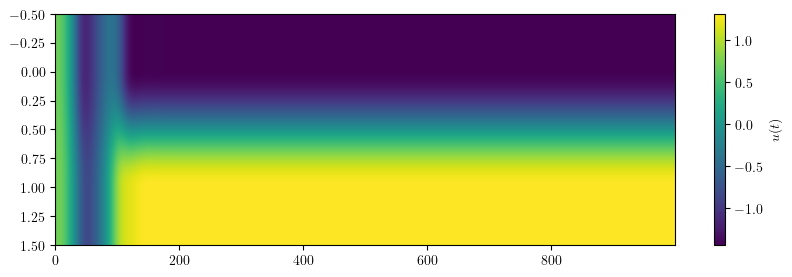

In [67]:

eps = 1.08  
a = .1
b = 0.8
I = 0
D = 1 
N = 2  

state0 = np.random.rand(2 * N)   

t = np.linspace(0, 100, 1000)

solution = spy.odeint(FHN_String, state0, t, args=(eps, a, b, I, D))

u, v = solution[:, :N], solution[:, N:]
print(solution.shape)

plt.figure(figsize=(10, 3))
plt.imshow(u.T, aspect='auto', cmap='viridis')
cbar = plt.colorbar()
cbar.set_label('$u(t)$')
# plt.xlabel('Time')
# plt.ylabel('Cell')

In [7]:
u.shape

(10, 20)